In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PHQ9 (923p)(8mr,8p)
The PHQ-9 is a valid measure of depression symptoms that are widely used for depression screening and treatment monitoring. Individuals report how often over the last 2 weeks they have experienced each of 9 core symptoms of major depression. This test was administered weekly from Week 0 to Week 4, then every two weeks until Week 12. It is a suitable tool for screening, diagnosing, and monitoring patients.

- Missing values (8 rows): Every **phq9_** column (NaN or 0.0) except **sum_phq9** and **phq9_1**

In [2]:
df_phq9 = pd.read_csv("original_data/phq9.csv")
df_phq9 = df_phq9.iloc[:, 3:]

# Location duration (315p)
- Missing values: Category: "none", "undefined category", "other"

In [3]:
df_location_duration = pd.read_csv("original_data/location_duration.csv")
df_location_duration = df_location_duration.iloc[:, 2:]  # Remove the first 3 columns

print(df_location_duration["participant_id"].nunique(), "participants")
df_location_duration

315 participants


,participant_id,date,category,duration
0,EN00033,2016-08-13,home,5699.0
1,EN00033,2016-08-13,none,23460.0
2,EN00033,2016-08-14,home,63239.0
3,EN00033,2016-08-14,none,0.0
4,EN00033,2016-08-15,home,44220.0
...,...,...,...,...
32027,ES05073,2017-03-20,home,360.0
32028,ES05073,2017-03-20,none,2220.0
32029,ES05073,2017-03-21,none,0.0
32030,ES05073,2017-03-22,home,26160.0


## Cleaning
- Remove rows of participants whose PHQ9 is not available
- Remove rows with undefined category
- Remove rows with duration == 0.0

Resulting size:
- 32'032 rows -> 12'077 rows (62% loss)
- 315 participants -> 240 participants (24% loss)

### Remove the participants whose PHQ9 is not available (64)
- 32'032 rows -> 29'435 rows (8% loss)
- 315 participants -> 251 participants (20% loss)

### Remove rows with category "none", "undefined category" or "other"
- 32'032 rows -> 17'414 rows (% loss)
- 315 participants -> 287 participants (11 participants have only been detected in "other" category) (4% loss)
- 22 categories -> 19 categories

In [4]:
# Count the unique categories
print(df_location_duration["category"].nunique(), "categories")
print(df_location_duration["category"].unique())

22 categories
['home' 'none' 'work' 'education' 'other' 'home_store' 'dining_out' 'park'
 'health' 'place_of_worship' 'personal_services' 'consumer_goods'
 'supermarket' 'finance' 'repair' 'lodging' 'entertainment' 'transit'
 'government_offices' 'automotive' 'place_of_mourning'
 'undefined category']


In [5]:
# Remove all rows with category "none", "other", "undefined category"
df_location_duration_no_none = df_location_duration[
    (df_location_duration["category"] != "none")
    & (df_location_duration["category"] != "other")
    & (df_location_duration["category"] != "undefined category")
]

print(df_location_duration_no_none["participant_id"].nunique(), "participants")
print(df_location_duration_no_none["category"].nunique(), "categories")
print(df_location_duration_no_none["category"].unique())
df_location_duration_no_none

287 participants
19 categories
['home' 'work' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
0,EN00033,2016-08-13,home,5699.0
2,EN00033,2016-08-14,home,63239.0
4,EN00033,2016-08-15,home,44220.0
5,EN00033,2016-08-16,home,9900.0
6,EN00033,2016-08-16,work,24060.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


The ratios are computed only on measures not belonging to these categories

=> The remaining ratio is considered implicitly as the ratio of an undefined category

### Remove rows with duration == 0.0
- 16'083 rows -> 12'077 rows (25% loss)
- same # participants
- same # categories

In [6]:
# Remove the rows with duration 0
df_location_duration_no_none = df_location_duration_no_none[
    df_location_duration_no_none["duration"] != 0
]

print(df_location_duration_no_none["participant_id"].nunique(), "participants")
print(df_location_duration_no_none["category"].nunique(), "categories")
print(df_location_duration_no_none["category"].unique())
df_location_duration_no_none

287 participants
19 categories
['home' 'work' 'education' 'home_store' 'dining_out' 'park' 'health'
 'place_of_worship' 'personal_services' 'consumer_goods' 'supermarket'
 'finance' 'repair' 'lodging' 'entertainment' 'transit'
 'government_offices' 'automotive' 'place_of_mourning']


,participant_id,date,category,duration
0,EN00033,2016-08-13,home,5699.0
2,EN00033,2016-08-14,home,63239.0
4,EN00033,2016-08-15,home,44220.0
5,EN00033,2016-08-16,home,9900.0
6,EN00033,2016-08-16,work,24060.0
...,...,...,...,...
32021,ES05073,2017-03-16,home,31260.0
32023,ES05073,2017-03-17,home,20579.0
32025,ES05073,2017-03-18,home,58920.0
32027,ES05073,2017-03-20,home,360.0


## Stats

### Date counts per participant

Number of dates per participant:
   - Min: 1
   - Max: 186
   - Mean: 39.53310104529617
   - Median: 31.0
participant_id
EN00033    16
EN00039    48
EN00041    32
EN00046    49
EN00047    10
           ..
ES05054    52
ES05059    22
ES05060    71
ES05062    64
ES05073    53
Name: date, Length: 287, dtype: int64


<AxesSubplot:xlabel='date'>

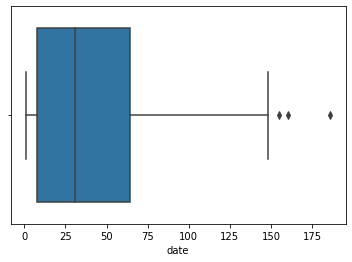

In [7]:
# Count the number of different dates at which each participant was studied
date_counts = df_location_duration_no_none.groupby("participant_id")["date"].nunique()

print("Number of dates per participant:")
print("   - Min:", date_counts.min())
print("   - Max:", date_counts.max())
print("   - Mean:", date_counts.mean())
print("   - Median:", date_counts.median())
print(date_counts)
sns.boxplot(x=date_counts)

### (Defined) Category counts per participant per day

Number of categories per participant per day:
  - min: 1
  - max: 4
  - mean: 1.1585580821434867
  - median: 1.0
1    9708
2    1486
3     143
4       9
Name: count, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Count'>

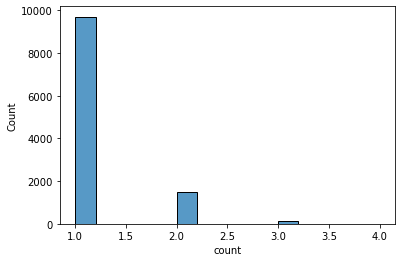

In [8]:
# Count the categories visited by each participant each day
category_counts = (
    df_location_duration_no_none.groupby(["participant_id", "date"])
    .size()
    .reset_index()
    .rename(columns={0: "count"})
    .sort_values("participant_id", ascending=True)
)

print("Number of categories per participant per day:")
print("  - min:", category_counts["count"].min())
print("  - max:", category_counts["count"].max())
print("  - mean:", category_counts["count"].mean())
print("  - median:", category_counts["count"].median())
print(category_counts["count"].value_counts())

sns.histplot(category_counts["count"])

<AxesSubplot:xlabel='count'>

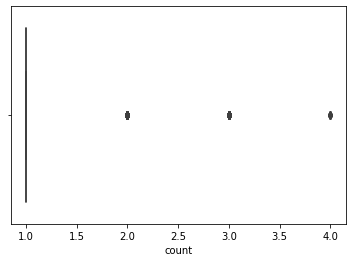

In [9]:
sns.boxplot(x=category_counts["count"])

Most of the time, only one DEFINED category per day

## Transformation: Ratio of the categories visited by each participant each day

- 12'077 rows -> 10'427 rows
- (240 participants -> 240 participants)

In [10]:
# Create a column for each category and put the duration (in seconds) spent in each category/column for each (participant, day) pair
df_location_ratio = df_location_duration_no_none.pivot_table(
    index=["participant_id", "date"],
    columns="category",
    values="duration",
    aggfunc=np.sum,
)
# Replace NaN with 0
df_location_ratio = df_location_ratio.fillna(0)
df_location_ratio

# Check all rows contain at least one non-zero value
assert len(df_location_ratio[df_location_ratio.sum(axis=1) == 0]) == 0

In [11]:
# Number of seconds in a day (86400)
seconds_in_day = 24 * 60 * 60

# Divide each category column by the number of seconds in a day
df_location_ratio = df_location_ratio.div(seconds_in_day)
df_location_ratio

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00033        2016-08-13         0.0             0.0         0.0        0.0   
               2016-08-14         0.0             0.0         0.0        0.0   
               2016-08-15         0.0             0.0         0.0        0.0   
               2016-08-16         0.0             0.0         0.0        0.0   
               2016-08-17         0.0             0.0         0.0        0.0   
...                               ...             ...         ...        ...   
ES05073        2017-03-16         0.0             0.0         0.0        0.0   
               2017-03-17         0.0             0.0         0.0        0.0   
               2017-03-18         0.0             0.0         0.0        0.0   
               2017-03-20         0.0             0.0         0.0        0.0   
               2017-03-22         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00033        2016-08-13            0.0      0.0                 0.0     0.0   
               2016-08-14            0.0      0.0                 0.0     0.0   
               2016-08-15            0.0      0.0                 0.0     0.0   
               2016-08-16            0.0      0.0                 0.0     0.0   
               2016-08-17            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05073        2017-03-16            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
               2017-03-18            0.0      0.0                 0.0     0.0   
               2017-03-20            0.0      0.0                 0.0     0.0   
               2017-03-22            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00033        2016-08-13  0.065961         0.0      0.0   0.0   
               2016-08-14  0.731933         0.0      0.0   0.0   
               2016-08-15  0.511806         0.0      0.0   0.0   
               2016-08-16  0.114583         0.0      0.0   0.0   
               2016-08-17  0.000000         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05073        2017-03-16  0.361806         0.0      0.0   0.0   
               2017-03-17  0.238183         0.0      0.0   0.0   
               2017-03-18  0.681944         0.0      0.0   0.0   
               2017-03-20  0.004167         0.0      0.0   0.0   
               2017-03-22  0.302778         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00033        2016-08-13                0.0                0.0   
               2016-08-14                0.0                0.0   
               2016-08-15                0.0                0.0   
               2016-08-16                0.0                0.0   
               2016-08-17                0.0                0.0   
...                                      ...                ...   
ES05073        2017-03-16                0.0                0.0   
               2017-03-17                0.0                0.0   
               2017-03-18                0.0                0.0   
               2017-03-20                0.0                0.0   
               2017-03-22                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00033        2016-

## Stats

### Most visited categories

<AxesSubplot:ylabel='Count'>

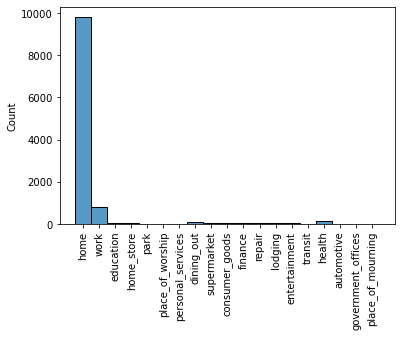

In [12]:
# For each (participant, day) pair, print the category with the highest ratio
df_location_ratio_max = df_location_ratio.idxmax(axis=1)
plt.xticks(rotation=90)
sns.histplot(df_location_ratio_max)

In [13]:
pd.concat(
    [
        df_location_ratio_max.value_counts(),
        df_location_ratio_max.value_counts(normalize=True),
    ],
    axis=1,
    keys=("count", "freq"),
)

,count,freq
home,9811,0.864710
work,828,0.072977
health,144,0.012692
dining_out,81,0.007139
lodging,66,0.005817
entertainment,53,0.004671
consumer_goods,46,0.004054
finance,45,0.003966
repair,42,0.003702
supermarket,41,0.003614


The most visited category is "home" for 86.3% of the participants

### Days where participant visited more than one defined location (2, 3 or 4)

In [14]:
df_many_locations = df_location_ratio.loc[
    (df_location_ratio.iloc[:, 2:] > 0).sum(axis=1) > 1
]
df_many_locations

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00033        2016-08-16         0.0             0.0    0.000000        0.0   
               2016-08-19         0.0             0.0    0.000000        0.0   
EN00039        2016-11-28         0.0             0.0    0.000000        0.0   
               2016-12-17         0.0             0.0    0.011806        0.0   
EN00046        2016-09-28         0.0             0.0    0.000000        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-03-10         0.0             0.0    0.000000        0.0   
               2017-03-23         0.0             0.0    0.000000        0.0   
ES05062        2017-01-16         0.0             0.0    0.000000        0.0   
               2017-03-05         0.0             0.0    0.009722        0.0   
               2017-03-31         0.0             0.0    0.017361        0.0   

category                   entertainment   finance  government_offices  \
participant_id date                                                      
EN00033        2016-08-16            0.0  0.000000                 0.0   
               2016-08-19            0.0  0.000000                 0.0   
EN00039        2016-11-28            0.0  0.000000                 0.0   
               2016-12-17            0.0  0.000000                 0.0   
EN00046        2016-09-28            0.0  0.000000                 0.0   
...                                  ...       ...                 ...   
ES05060        2017-03-10            0.0  0.000000                 0.0   
               2017-03-23            0.0  0.000000                 0.0   
ES05062        2017-01-16            0.0  0.041667                 0.0   
               2017-03-05            0.0  0.000000                 0.0   
               2017-03-31            0.0  0.000000                 0.0   

category                     health      home  home_store   lodging  park  \
participant_id date                                                         
EN00033        2016-08-16  0.000000  0.114583      0.0000  0.000000   0.0   
               2016-08-19  0.000000  0.222211      0.0000  0.000000   0.0   
EN00039        2016-11-28  0.000000  0.077083      0.1125  0.000000   0.0   
               2016-12-17  0.000000  0.071516      0.0000  0.000000   0.0   
EN00046        2016-09-28  0.010417  0.085405      0.0000  0.000000   0.0   
...                             ...       ...         ...       ...   ...   
ES05060        2017-03-10  0.000000  0.386100      0.0000  0.073611   0.0   
               2017-03-23  0.016667  0.900683      0.0000  0.000000   0.0   
ES05062        2017-01-16  0.000000  0.468056      0.0000  0.000000   0.0   
               2017-03-05  0.000000  0.226377      0.0000  0.000000   0.0   
               2017-03-31  0.000000  0.031933      0.0000  0.000000   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00033        2016-08-16                0.0                0.0   
               2016-08-19                0.0                0.0   
EN00039        2016-11-28                0.0                0.0   
               2016-12-17                0.0                0.0   
EN00046        2016-09-28                0.0                0.0   
...                                      ...                ...   
ES05060        2017-03-10                0.0                0.0   
               2017-03-23                0.0                0.0   
ES05062        2017-01-16                0.0                0.0   
               2017-03-05                0.0                0.0   
               2017-03-31                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                          

Observation: 86.4% of the measurements (9012 / 10427) have been done in only one (defined) location

participant_id  date      
EN00033         2016-08-13    0.065961
                2016-08-14    0.731933
                2016-08-15    0.511806
                2016-08-16    0.393056
                2016-08-17    0.240972
                                ...   
ES05073         2017-03-16    0.361806
                2017-03-17    0.238183
                2017-03-18    0.681944
                2017-03-20    0.004167
                2017-03-22    0.302778
Length: 11346, dtype: float64


<AxesSubplot:ylabel='Count'>

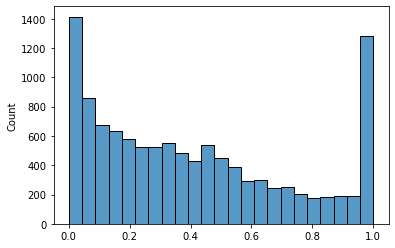

In [15]:
df_location_ratio_sum = df_location_ratio.sum(axis=1)
print(df_location_ratio_sum)

# Distribution of the sums
sns.histplot(df_location_ratio_sum)

Location ratio sum per participant per day:
  - min: 0.0006828703703703705
  - max: 0.999988425925926
  - mean: 0.40758811128575256
  - median: 0.3402777777777778


<AxesSubplot:>

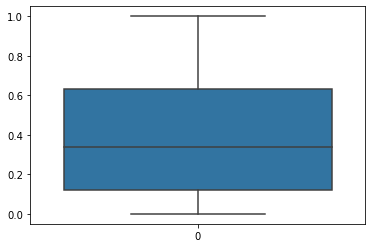

In [16]:
print("Location ratio sum per participant per day:")
print("  - min:", df_location_ratio_sum.min())
print("  - max:", df_location_ratio_sum.max())
print("  - mean:", df_location_ratio_sum.mean())
print("  - median:", df_location_ratio_sum.median())
sns.boxplot(df_location_ratio_sum)

Observation: All participants have missing location duration info, most of them between 40 and 60%

#### Days with lot of location ratio info (almost 100%)

In [17]:
df_lot_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.max()]
df_lot_info

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00039        2016-11-14         0.0             0.0         0.0        0.0   
               2016-12-09         0.0             0.0         0.0        0.0   
               2016-12-10         0.0             0.0         0.0        0.0   
               2016-12-15         0.0             0.0         0.0        0.0   
               2016-12-18         0.0             0.0         0.0        0.0   
...                               ...             ...         ...        ...   
ES05060        2017-02-24         0.0             0.0         0.0        0.0   
               2017-03-17         0.0             0.0         0.0        0.0   
ES05062        2017-01-23         0.0             0.0         0.0        0.0   
               2017-03-06         0.0             0.0         0.0        0.0   
ES05073        2017-03-12         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00039        2016-11-14            0.0      0.0                 0.0     0.0   
               2016-12-09            0.0      0.0                 0.0     0.0   
               2016-12-10            0.0      0.0                 0.0     0.0   
               2016-12-15            0.0      0.0                 0.0     0.0   
               2016-12-18            0.0      0.0                 0.0     0.0   
...                                  ...      ...                 ...     ...   
ES05060        2017-02-24            0.0      0.0                 0.0     0.0   
               2017-03-17            0.0      0.0                 0.0     0.0   
ES05062        2017-01-23            0.0      0.0                 0.0     0.0   
               2017-03-06            0.0      0.0                 0.0     0.0   
ES05073        2017-03-12            0.0      0.0                 0.0     0.0   

category                       home  home_store  lodging  park  \
participant_id date                                              
EN00039        2016-11-14  0.999988         0.0      0.0   0.0   
               2016-12-09  0.999988         0.0      0.0   0.0   
               2016-12-10  0.999988         0.0      0.0   0.0   
               2016-12-15  0.999988         0.0      0.0   0.0   
               2016-12-18  0.999988         0.0      0.0   0.0   
...                             ...         ...      ...   ...   
ES05060        2017-02-24  0.999988         0.0      0.0   0.0   
               2017-03-17  0.999988         0.0      0.0   0.0   
ES05062        2017-01-23  0.999988         0.0      0.0   0.0   
               2017-03-06  0.999988         0.0      0.0   0.0   
ES05073        2017-03-12  0.999988         0.0      0.0   0.0   

category                   personal_services  place_of_mourning  \
participant_id date                                               
EN00039        2016-11-14                0.0                0.0   
               2016-12-09                0.0                0.0   
               2016-12-10                0.0                0.0   
               2016-12-15                0.0                0.0   
               2016-12-18                0.0                0.0   
...                                      ...                ...   
ES05060        2017-02-24                0.0                0.0   
               2017-03-17                0.0                0.0   
ES05062        2017-01-23                0.0                0.0   
               2017-03-06                0.0                0.0   
ES05073        2017-03-12                0.0                0.0   

category                   place_of_worship  repair  supermarket  transit  \
participant_id date                                                         
EN00039        2016-

In [18]:
# For each (participant_id, date) pair of df_lot_info, get the name of the category with the highest ratio
df_lot_info_max = df_location_ratio_max.loc[df_lot_info.index]
df_lot_info_max.value_counts()

home           1148
work              3
supermarket       1
dtype: int64

Almost all the spent whole the day at home

In [19]:
df_lot_info[df_lot_info["work"] > 0]

category                   automotive  consumer_goods  dining_out  education  \
participant_id date                                                            
EN00073        2016-11-02         0.0             0.0         0.0        0.0   
               2016-11-03         0.0             0.0         0.0        0.0   
EN00136        2016-09-24         0.0             0.0         0.0        0.0   

category                   entertainment  finance  government_offices  health  \
participant_id date                                                             
EN00073        2016-11-02            0.0      0.0                 0.0     0.0   
               2016-11-03            0.0      0.0                 0.0     0.0   
EN00136        2016-09-24            0.0      0.0                 0.0     0.0   

category                   home  home_store  lodging  park  personal_services  \
participant_id date                                                             
EN00073        2016-11-02   0.0         0.0      0.0   0.0                0.0   
               2016-11-03   0.0         0.0      0.0   0.0                0.0   
EN00136        2016-09-24   0.0         0.0      0.0   0.0                0.0   

category                   place_of_mourning  place_of_worship  repair  \
participant_id date                                                      
EN00073        2016-11-02                0.0               0.0     0.0   
               2016-11-03                0.0               0.0     0.0   
EN00136        2016-09-24                0.0               0.0     0.0   

category                   supermarket  transit      work  
participant_id date                                        
EN00073        2016-11-02          0.0      0.0  0.999988  
               2016-11-03          0.0      0.0  0.999988  
EN00136        2016-09-24          0.0      0.0  0.999988

spent the whole day at work

In [20]:
# Rows where 'supermarket' not zero
df_lot_info[df_lot_info["supermarket"] > 0]

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00416,2017-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999988,0.0,0.0


spent the whole day in a supermarket

#### Days with few location ratio info (almost 0%)

In [21]:
df_few_info = df_location_ratio[df_location_ratio_sum == df_location_ratio_sum.min()]
df_few_info

,category,automotive,consumer_goods,dining_out,education,entertainment,finance,government_offices,health,home,home_store,lodging,park,personal_services,place_of_mourning,place_of_worship,repair,supermarket,transit,work
participant_id,date,,,,,,,,,,,,,,,,,,,
EN00147,2016-09-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00295,2016-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00554,2017-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EN00588,2016-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# For each (participant_id, date) pair of df_few_info, get the name of the category with the highest ratio
df_few_info_max = df_location_ratio_max.loc[df_few_info.index]
df_few_info_max.value_counts()

home    4
dtype: int64

## Write to csv

In [23]:
df_location_ratio.to_csv("df_location_ratio.csv")

# Passive mobility features (319p)

- Missing values:
    - **location_variance** (NaN: "(nothing)")

In [24]:
df_passive_mobility_features = pd.read_csv(
    "original_data/passive_mobility_features_brighten_v2.csv"
)
df_passive_mobility_features = df_passive_mobility_features.iloc[:, 3:]

print(df_passive_mobility_features["participant_id"].nunique(), "participants")
df_passive_mobility_features

319 participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,9.733,0.000,11.750,6.833,1.517,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,0.133,0.000,20.133,3.833,2.117,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,0.167,0.183,11.767,4.817,0.917,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,0.200,0.050,25.883,17.900,2.467,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,0.167,0.550,16.467,3.967,1.467,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,5.567,0.083,0.000,0.000,0.000,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,2.683,0.000,10.717,4.667,0.383,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,14.083,0.000,20.683,20.000,0.083,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,0.250,0.183,27.117,27.117,0.267,-4.361


## Cleaning

### Remove the participants whose PHQ9 is not available (68)

Resulting size:
- 16790 rows -> 15356 rows (8.5% loss)
- 319 participants -> 251 participants (21% loss)

## Merge info from location_duration and passive mobility features

In [25]:
# All the (participant_id, date) pairs in df_location_ratio
pairs_1 = set(df_location_ratio.index)
print(len(pairs_1))

# All the (participant_id, dt_passive) pairs in df_passive_mobility_features
pairs_2 = set(
    df_passive_mobility_features[["participant_id", "dt_passive"]].itertuples(
        index=False, name=None
    )
)
print(len(pairs_2))

pairs_1_not_2 = pairs_1 - pairs_2
print(
    "Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features:",
    len(pairs_1_not_2),
)
pairs_2_not_1 = pairs_2 - pairs_1
print(
    "Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio:",
    len(pairs_2_not_1),
)
# Intersection
pairs_1_and_2 = pairs_1 & pairs_2
print(
    "Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features:",
    len(pairs_1_and_2),
)

11346
16790
Number of (participant_id, date) pairs in df_location_ratio but not in df_passive_mobility_features: 49
Number of (participant_id, dt_passive) pairs in df_passive_mobility_features but not in df_location_ratio: 5493
Number of (participant_id, date) pairs in df_location_ratio and in df_passive_mobility_features: 11297


In [26]:
# Print the name of the columns who have missing values
print(df_passive_mobility_features.columns[df_passive_mobility_features.isnull().any()])

# Print the rows who have missing values
df_passive_mobility_features_miss = df_passive_mobility_features[
    df_passive_mobility_features.isnull().any(axis=1)
]
print(
    len(df_passive_mobility_features_miss),
    "missing rows,",
    df_passive_mobility_features_miss["participant_id"].nunique(),
    "missing participants",
)
df_passive_mobility_features_miss.sort_values(by=["participant_id", "week"])

Index(['location_variance'], dtype='object')
492 missing rows, 158 missing participants


,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
7308,EN00033,2016-09-10,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,5.400,0.0,9.400,9.4,0.0,NaN
10810,EN00036,2016-09-13,4,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.783,0.0,0.000,0.0,0.0,NaN
2654,EN00039,2016-11-29,15,False,0.0,0.0,0.0,0.0,1,0.0,0.0,7.217,0.0,0.000,0.0,0.0,NaN
2657,EN00039,2016-12-05,16,False,0.0,0.0,0.0,0.0,1,0.0,0.0,5.400,0.0,0.000,0.0,0.0,NaN
2680,EN00039,2017-01-02,20,False,0.0,0.0,0.0,0.0,1,0.0,0.0,22.583,0.0,0.000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,ES05054,2017-03-23,10,False,0.0,0.0,0.0,0.0,1,0.0,0.0,12.983,0.0,9.917,0.0,0.0,NaN
9316,ES05054,2017-04-09,13,False,0.0,0.0,0.0,0.0,1,0.0,0.0,16.267,0.0,14.517,0.0,0.0,NaN
9322,ES05054,2017-04-17,14,False,0.0,0.0,0.0,0.0,1,0.0,0.0,4.650,0.0,0.000,0.0,0.0,NaN
12713,ES05060,2017-02-02,3,False,0.0,0.0,0.0,0.0,1,0.0,0.0,17.133,0.0,12.883,0.0,0.0,NaN


Observation: 
All rows where location = NaN have "home" as sole category. We can compare "hours stationary" and "duration" to deduce they spent the whole day at home if equal.


Observation: 
- All have distances == 0.0
- But rows that have **location_variance** != 0.0 may also have distances == 0.0

=> the distances have been rounded down before being written on csv, and the distances of missing are truly 0 (log = \infty) -> stay at home! -> transform to 0.0

In [27]:
df_passive_mobility_features_zero = df_passive_mobility_features[
    (df_passive_mobility_features["distance_active"] == 0.0)
    & (df_passive_mobility_features["distance_high_speed_transportation"] == 0.0)
    & (df_passive_mobility_features["distance_powered_vehicle"] == 0.0)
    & (df_passive_mobility_features["distance_walking"] == 0.0)
].sort_values(by=["participant_id", "dt_passive"])
df_passive_mobility_features_zero

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,hours_high_speed_transportation,hours_of_sleep,hours_powered_vehicle,hours_stationary,hours_stationary_nhw,hours_walking,location_variance
7282,EN00033,2016-08-14,0,False,0.0,0.0,0.0,0.0,3,0.0,0.0,15.450,0.0,21.683,21.683,0.0,-4.417
7283,EN00033,2016-08-15,0,False,0.0,0.0,0.0,0.0,1,0.0,0.0,14.583,0.0,12.283,12.283,0.0,-10.260
7295,EN00033,2016-08-28,2,False,0.0,0.0,0.0,0.0,2,0.0,0.0,5.950,0.0,10.833,10.833,0.0,-4.986
7296,EN00033,2016-08-29,2,False,0.0,0.0,0.0,0.0,2,0.0,0.0,3.850,0.0,0.767,0.767,0.0,-4.627
7301,EN00033,2016-09-03,3,False,0.0,0.0,0.0,0.0,2,0.0,0.0,17.233,0.0,22.100,22.100,0.0,-4.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15749,ES05073,2017-02-04,2,False,0.0,0.0,0.0,0.0,9,0.0,0.0,19.900,0.0,8.633,0.000,0.0,-10.188
15752,ES05073,2017-02-07,2,False,0.0,0.0,0.0,0.0,8,0.0,0.0,3.033,0.0,11.667,4.683,0.0,-6.372
15756,ES05073,2017-02-11,3,False,0.0,0.0,0.0,0.0,13,0.0,0.0,14.883,0.0,23.100,0.000,0.0,-9.146
15792,ES05073,2017-03-21,8,False,0.0,0.0,0.0,0.0,2,0.0,0.0,23.383,0.0,0.400,0.400,0.0,-6.124


In [28]:
# Assumption: Count hours of sleep into home
# Transform hours into seconds

# Transform each "hours_" counts into seconds
for col in [
    "hours_high_speed_transportation",
    "hours_of_sleep",
    "hours_powered_vehicle",
    "hours_stationary",
    "hours_stationary_nhw",
    "hours_walking",
]:
    # Rename column
    df_passive_mobility_features[col] = df_passive_mobility_features[col] * 3600
    df_passive_mobility_features.rename(
        columns={col: col.replace("hours_", "seconds_")}, inplace=True
    )
df_passive_mobility_features

,participant_id,dt_passive,week,came_to_work,distance_active,distance_high_speed_transportation,distance_powered_vehicle,distance_walking,hours_accounted_for,hours_active,seconds_high_speed_transportation,seconds_of_sleep,seconds_powered_vehicle,seconds_stationary,seconds_stationary_nhw,seconds_walking,location_variance
0,EN00538,2016-11-14,0,True,6284.6,0.0,0.0,5420.4,8,0.783,0.0,35038.8,0.0,42300.0,24598.8,5461.2,-5.261
1,EN00538,2016-11-15,0,True,15960.1,0.0,0.0,7120.3,24,1.733,0.0,478.8,0.0,72478.8,13798.8,7621.2,-5.440
2,EN00538,2016-11-16,0,True,4359.7,0.0,9656.3,3456.6,12,0.567,0.0,601.2,658.8,42361.2,17341.2,3301.2,-4.209
3,EN00538,2016-11-17,0,True,22387.9,0.0,1143.0,9809.7,16,2.583,0.0,720.0,180.0,93178.8,64440.0,8881.2,-5.122
4,EN00538,2016-11-18,0,True,45277.7,0.0,22332.9,5856.4,24,5.500,0.0,601.2,1980.0,59281.2,14281.2,5281.2,-4.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16785,EN05215,2016-11-25,1,False,10737.4,0.0,2685.7,0.0,2,0.783,0.0,20041.2,298.8,0.0,0.0,0.0,-3.984
16786,EN05215,2016-11-26,2,True,3794.3,0.0,0.0,1844.3,7,0.350,0.0,9658.8,0.0,38581.2,16801.2,1378.8,-4.763
16787,EN05215,2016-11-27,2,True,1949.1,0.0,0.0,241.8,5,0.300,0.0,50698.8,0.0,74458.8,72000.0,298.8,-5.478
16788,EN05215,2016-11-28,2,False,3113.3,0.0,5350.6,1241.7,5,0.350,0.0,900.0,658.8,97621.2,97621.2,961.2,-4.361


In [29]:
# Category:
# sleep -> home

## Save

In [30]:
df_passive_mobility_features.to_csv("df_passive_mobility_features.csv", index=False)